In this notebook, we will quckly remind ourselves about trigonometry and the characteristics of an oscillatory signal.

# Important: Run this code cell each time you start a new session!

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
!pip install librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Audio
import librosa as lr
import librosa.display

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
!wget -Ncnp https://physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id00b70b13.csv

--2023-07-06 15:39:06--  https://physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id00b70b13.csv
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25931775 (25M) [text/plain]
Saving to: ‘id00b70b13.csv’

id00b70b13.csv      100%[===================>]  24.73M   452KB/s    in 55s     

2023-07-06 15:40:01 (460 KB/s) - ‘id00b70b13.csv’ saved [25931775/25931775]



In [ ]:
df = pd.read_csv('id00b70b13.csv')

# Filter to only walking activity, which is given a code of 1
df = df[df['activity'] == 1]

# Process the time
df.rename(columns={'time_s': 'Time'}, inplace=True)
df = df[(df['Time']>=700) & (df['Time']<=710)]
df['Time'] = df['Time'] - df['Time'].min()

# Process the accel
df['Accel'] = np.sqrt(df['la_x']**2 + df['la_y']**2 + df['la_z']**2)*9.8

# Keep only crucial columns
keep_cols = ['Time', 'Accel']
df = df[keep_cols]
df.to_csv('walking.csv',index=False)

In [ ]:
!wget -Ncnp https://physionet.org/files/sufhsdb/1.0.1/f1.wav

--2023-07-06 15:40:04--  https://physionet.org/files/sufhsdb/1.0.1/f1.wav
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2432684 (2.3M) [text/plain]
Saving to: ‘f1.wav’

f1.wav              100%[===================>]   2.32M   450KB/s    in 5.3s    

2023-07-06 15:40:09 (452 KB/s) - ‘f1.wav’ saved [2432684/2432684]



In [ ]:
os.rename('f1.wav', 'heart_sound.wav')

# A Brief Reminder of Trigonometry

***Sine*** and ***cosine*** are fundamental trigonometric functions that represent the oscillation of a point along a unit circle as it rotates around the origin. A unit circle is composed of 360 degrees == 2$\pi$ ***radians***. As a reminder, radians are another unit for angular measurements that are slightly more natural for mathematical expressions. By default, `numpy`'s implementation of sine and cosine assume that the inputs are in radians.

<img src="https://drive.google.com/uc?id=1yLEQ7qdVfDC_SPvYSzslKfkzXEN0XGdU" width=200px/>

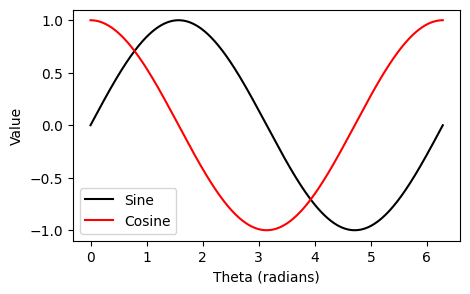

In [ ]:
x = np.linspace(0, 2*np.pi, 1000)
plt.figure(figsize=(5,3))
plt.plot(x, np.sin(x), 'k-', label='Sine')
plt.plot(x, np.cos(x), 'r-', label='Cosine')
plt.legend()
plt.xlabel('Theta (radians)')
plt.ylabel('Value')
plt.show()

Fortunately, we won't need to worry about radians for the sake of data science. However, you will occasionally notice factors of 2$\pi$ snuck into various parts of the code in this notebook. This is done to so that we can express other characteristics of the signal in more intuitive units that relate to time.

With that in mind, there are a few terms we use to describe the characteristics of a sinusoidal wave:
* **Maxima and minima:** The peaks and troughs of the wave respectively
* **Amplitude ($A$):** The maximum distance between the maxima and minima of the wave, expressed in units of the y-axis
* **Period ($T$):** The time difference between two successive maxima, expressed in units of time
* **Frequency ($f$):** The inverse of the period, describing how fast the signal oscillates over time, expressed in Hz
* **Phase ($\phi$):** The positional shift of the wave in time, expressed in units of radians or degrees

All in all, we can express a sinusoid using the following equation: $y(t) = A*\sin(ft + \phi)$


The code block below shows a baseline sinusoid with unit amplitude, a frequency of 1 Hz, and no phase shift.
Play around with the sliders below to change these characteristics for the sinusoid in red to see how they impact its shape.

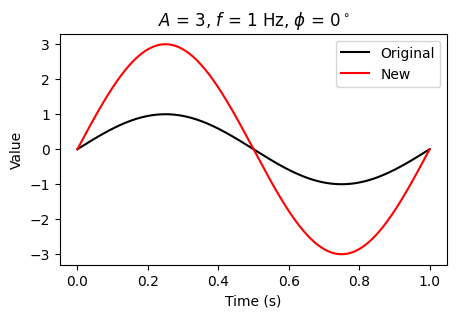

In [ ]:
amp = 1 #@param {type:"slider", min:1, max:5, step:1}
freq_hz = 1 #@param {type:"slider", min:1, max:5, step:1}
phase_deg = 0 #@param {type:"slider", min:0, max:180, step:45}
x = np.linspace(0, 1, 1000)
y_orig = np.sin(2*np.pi*x)
y_new = amp*np.sin(2*np.pi*(freq_hz*x+phase_deg/360))

plt.figure(figsize=(5,3))
plt.plot(x, y_orig, 'k-', label='Original')
plt.plot(x, y_new, 'r-', label='New')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title(f'$A$ = {amp}, $f$ = {freq_hz} Hz, $\phi$ = {phase_deg}$^\circ$')
plt.show()

We will primarily concern ourselves with the amplitude and frequency of signals in this course, but phase can contain useful information for a minority of tasks.